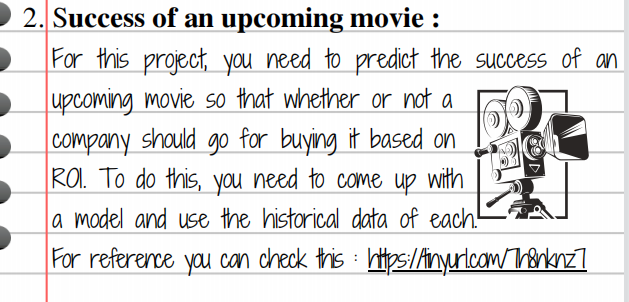

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [130]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
data = pd.read_csv('/content/gdrive/MyDrive/movie_success_rate.csv')



In [132]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.10000,757074.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.00000,485820.0000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.30000,157606.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.20000,60545.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.20000,393727.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
features = data[['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']]
target = data['Success']

In [134]:
missing_values = np.isnan(target)
features = features[~missing_values]
target = target[~missing_values]

In [135]:
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)


In [136]:
x_train, x_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)


In [137]:

rf_regressor = RandomForestRegressor()

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.007723809523809523


R-squared Score: 0.9531693233082706


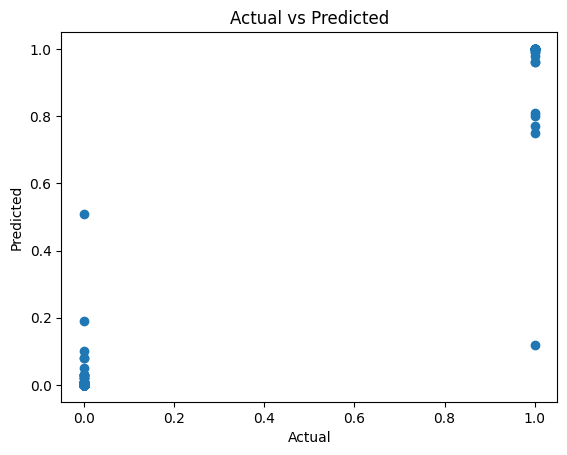

In [138]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [153]:
upcoming_movie = pd.DataFrame({
    'Rating': [7.0],
    'Revenue (Millions)': [20120],
    'Metascore': [80],
    'Year': [2023],
    'Runtime (Minutes)': [12000],
    'Votes': [100000]
})

success_prediction = rf_regressor.predict(upcoming_movie)
print('Success Prediction:', success_prediction)

Success Prediction: [0.22]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [150]:
# Features of the upcoming movie
upcoming_movie = pd.DataFrame({
    'Year': [2023],
    'Runtime (Minutes)': [1811110],
    'Rating': [9.5],
    'Votes': [5055500],
    'Revenue (Millions)': [4000000],
    'Metascore': [70000000000]
})

# Make the prediction
success_prediction = rf_regressor.predict(upcoming_movie)
print('Success Prediction:', success_prediction)

Success Prediction: [0.98]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [97]:
# Features of the upcoming movie
upcoming_movie = pd.DataFrame({
    'Rating': [6.8],
    'Revenue (Millions)': [200],
    'Metascore': [80],
    'Year': [2023],  # Add the appropriate values for other features
    'Runtime (Minutes)': [120],
    'Votes': [10000]
})

# Make the prediction
success_prediction = rf_regressor.predict(upcoming_movie)
print('Success Prediction:', success_prediction)

Success Prediction: [0.13]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


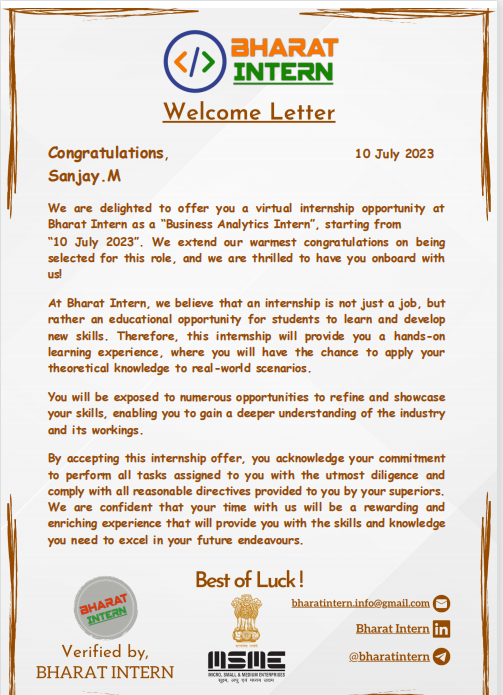